In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import logisticregression as LoRGD

In [2]:
data = pd.read_csv('marks.txt', header = None)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
admitted = data.loc[y == 1]
not_admitted = data.loc[y == 0]

@@@ [99.23686096 18.56421454]


<ipython-input-17-af1000c111e3>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


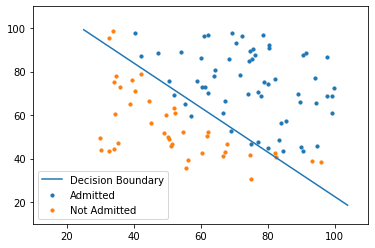

In [17]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

###looks that I m using 100 per cent of the data as training data.
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))


# carica classe con modello from scratch (usando gradient descent from scipy)
model = LoRGD.LinearRegressionUsingGD()
model.fit(X, y, theta)
parameters = model.parameters

##to plot decision boundary (line)
x_values = [np.min(X[:, 1]-5), np.max(X[:, 2]+5)]
y_values = -(parameters[0]+np.dot(parameters[1], x_values))/parameters[2]


plt.plot(x_values, y_values, label='Decision Boundary')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.xlim(10,110)
plt.ylim(10,110)
plt.legend()


In [24]:
##evaluate predicted values with training data
probab_threshold=0.5
predicted_classes = (model.predict(X) >= probab_threshold).astype(int)
predicted_classes = predicted_classes.flatten()
accuracy = np.mean(predicted_classes == y.flatten()) ## calcola quanti falsi ci sono in totale e da la percantuale
print(accuracy*100,"% accuracy")

89.0 % accuracy
